# **Preprocessing**

In [33]:
import pandas as pd

In [34]:
merged_df = pd.read_csv('/Users/jaekyunpark/Documents/GitHub/S-PQuantTeam01/merged_market_data.csv') # 경로는 수정해주세요
merged_df

,tickerSymbol,exchangeSymbol,ISOCode,priceClose,pricingDate
0,ALB,NYSE,USD,162.08,2023-10-10
1,ALB,NYSE,USD,155.75,2023-10-09
2,ALB,NYSE,USD,159.84,2023-10-06
3,ALB,NYSE,USD,155.03,2023-10-05
4,ALB,NYSE,USD,158.40,2023-10-04
...,...,...,...,...,...
846007,VLTO,NYSE,USD,77.05,2023-10-03
846008,VLTO,NYSE,USD,85.12,2023-10-02
846009,VLTO,NYSE,USD,84.56,2023-09-29
846010,VLTO,NYSE,USD,84.65,2023-09-28


In [35]:
# merged_df를 우리가 흔히 보는 df 방식으로 바꿈, 기간도 맞춤

a = merged_df.pivot_table(values='priceClose', index='pricingDate', columns='tickerSymbol', aggfunc='first')
a = a['2018-05-01':'2023-10-31']
a

tickerSymbol,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
pricingDate,,,,,,,,,,,,,,,,,,,,,
2018-05-01,66.24,43.36,42.2750,102.07,NaN,58.82,26.876666,151.92,224.08,88.86,...,191.85,46.65,76.95,50.64,70.37,86.64,116.95,136.78,55.05,83.40
2018-05-02,65.91,42.24,44.1425,100.37,NaN,57.85,26.310000,150.71,221.10,88.30,...,191.03,46.54,76.80,50.59,68.88,80.20,117.46,133.12,55.19,79.90
2018-05-03,66.34,42.11,44.2225,100.28,NaN,57.93,25.983333,151.73,226.05,87.91,...,191.62,46.48,76.54,49.24,69.63,82.67,115.18,133.54,54.45,80.38
2018-05-04,67.00,42.86,45.9575,100.17,NaN,58.74,26.276666,153.44,228.51,90.27,...,192.41,46.39,76.90,49.99,70.08,82.43,116.22,134.67,55.46,81.56
2018-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-04,111.67,12.73,173.6600,147.69,127.41,95.65,80.460000,309.39,518.42,173.79,...,88.21,56.63,111.50,33.30,91.22,123.53,109.69,230.94,33.33,170.99
2023-10-05,110.35,12.85,174.9100,147.45,124.99,96.20,81.640000,309.66,516.44,172.10,...,89.49,56.48,108.99,32.18,90.14,121.84,109.30,222.54,33.40,172.00
2023-10-06,110.64,12.76,177.4900,148.24,126.36,96.88,82.180000,312.19,526.68,173.97,...,92.41,57.35,107.17,32.48,90.97,119.46,110.91,223.85,33.69,175.58


In [36]:
# 각 column별 nan값 확인
# nan값은 평균 178개를 고정적으로 가지고 있는 column이 많은듯 

a.isnull().sum()

tickerSymbol
A       178
AAL     178
AAPL    178
ABBV    178
ABNB    837
       ... 
YUM     178
ZBH     178
ZBRA    178
ZION    178
ZTS     178
Length: 499, dtype: int64

In [37]:
# 499개 종목 중 nan 값이 164개가 아닌 종목들의 nan 개수 출력
# 일단 nan값이 고정적으로 발생한 이유는 date의 interval 차이인 것 같고 이거를 어떻게 해결하느냐가 문제
# 내 생각에는 164개의 nan 값을 가지고 있는 데이터들은 같은 date interval을 가지고 있음.
# 그렇기 때문에 164개의 nan 값을 가지고 있는 데이터들로 작업을 하는게 나을 것 같음
# 의견 공유 부탁드립니다.

for i in a.columns:
    if a[i].isnull().sum() != 178:
        print('Pivot Table에서 {}의 NAN값은 {}개 입니다.'.format(i, a[i].isnull().sum()))

Pivot Table에서 ABNB의 NAN값은 837개 입니다.
Pivot Table에서 AIG의 NAN값은 20개 입니다.
Pivot Table에서 AMCR의 NAN값은 457개 입니다.
Pivot Table에서 BIIB의 NAN값은 180개 입니다.
Pivot Table에서 BIO의 NAN값은 167개 입니다.
Pivot Table에서 CARR의 NAN값은 652개 입니다.
Pivot Table에서 CAT의 NAN값은 146개 입니다.
Pivot Table에서 CEG의 NAN값은 1115개 입니다.
Pivot Table에서 CNC의 NAN값은 177개 입니다.
Pivot Table에서 CTVA의 NAN값은 451개 입니다.
Pivot Table에서 DOW의 NAN값은 409개 입니다.
Pivot Table에서 FOXA의 NAN값은 394개 입니다.
Pivot Table에서 GEHC의 NAN값은 1344개 입니다.
Pivot Table에서 KDP의 NAN값은 226개 입니다.
Pivot Table에서 KVUE의 NAN값은 1439개 입니다.
Pivot Table에서 MRNA의 NAN값은 331개 입니다.
Pivot Table에서 OTIS의 NAN값은 652개 입니다.
Pivot Table에서 VLTO의 NAN값은 1539개 입니다.
Pivot Table에서 WELL의 NAN값은 152개 입니다.


In [39]:
#nan값이 178이상인 종목들을 drop

nan_counts = a.isna().sum()

columns_to_drop = nan_counts[nan_counts > 178].index.tolist()

a_filtered = a.drop(columns=columns_to_drop)

a_filtered


tickerSymbol,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
pricingDate,,,,,,,,,,,,,,,,,,,,,
2018-05-01,66.24,43.36,42.2750,102.07,58.82,26.876666,151.92,224.08,88.86,45.03,...,191.85,46.65,76.95,50.64,70.37,86.64,116.95,136.78,55.05,83.40
2018-05-02,65.91,42.24,44.1425,100.37,57.85,26.310000,150.71,221.10,88.30,44.43,...,191.03,46.54,76.80,50.59,68.88,80.20,117.46,133.12,55.19,79.90
2018-05-03,66.34,42.11,44.2225,100.28,57.93,25.983333,151.73,226.05,87.91,43.60,...,191.62,46.48,76.54,49.24,69.63,82.67,115.18,133.54,54.45,80.38
2018-05-04,67.00,42.86,45.9575,100.17,58.74,26.276666,153.44,228.51,90.27,43.86,...,192.41,46.39,76.90,49.99,70.08,82.43,116.22,134.67,55.46,81.56
2018-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-04,111.67,12.73,173.6600,147.69,95.65,80.460000,309.39,518.42,173.79,73.47,...,88.21,56.63,111.50,33.30,91.22,123.53,109.69,230.94,33.33,170.99
2023-10-05,110.35,12.85,174.9100,147.45,96.20,81.640000,309.66,516.44,172.10,73.13,...,89.49,56.48,108.99,32.18,90.14,121.84,109.30,222.54,33.40,172.00
2023-10-06,110.64,12.76,177.4900,148.24,96.88,82.180000,312.19,526.68,173.97,72.86,...,92.41,57.35,107.17,32.48,90.97,119.46,110.91,223.85,33.69,175.58


In [46]:
# NaN값이 178개 이상인 종목들을 drop한 후 저장
# 일단 최종적으로 SnP500 지수는 총 485종목을 볼 것임
# 5년의 기간에서 178일을 제거

a_filtered = a_filtered.dropna(axis=0)
a_filtered.to_csv('/Users/jaekyunpark/Documents/GitHub/S-PQuantTeam01/new_market.csv')
a_filtered

tickerSymbol,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
pricingDate,,,,,,,,,,,,,,,,,,,,,
2018-05-01,66.24,43.36,42.2750,102.07,58.82,26.876666,151.92,224.08,88.86,45.03,...,191.85,46.65,76.95,50.64,70.37,86.64,116.95,136.78,55.05,83.40
2018-05-02,65.91,42.24,44.1425,100.37,57.85,26.310000,150.71,221.10,88.30,44.43,...,191.03,46.54,76.80,50.59,68.88,80.20,117.46,133.12,55.19,79.90
2018-05-03,66.34,42.11,44.2225,100.28,57.93,25.983333,151.73,226.05,87.91,43.60,...,191.62,46.48,76.54,49.24,69.63,82.67,115.18,133.54,54.45,80.38
2018-05-04,67.00,42.86,45.9575,100.17,58.74,26.276666,153.44,228.51,90.27,43.86,...,192.41,46.39,76.90,49.99,70.08,82.43,116.22,134.67,55.46,81.56
2018-05-07,67.39,42.44,46.2900,99.63,59.32,26.376666,152.30,230.99,90.50,43.69,...,191.91,46.13,77.74,46.92,70.02,83.11,116.99,137.48,55.51,82.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-04,111.67,12.73,173.6600,147.69,95.65,80.460000,309.39,518.42,173.79,73.47,...,88.21,56.63,111.50,33.30,91.22,123.53,109.69,230.94,33.33,170.99
2023-10-05,110.35,12.85,174.9100,147.45,96.20,81.640000,309.66,516.44,172.10,73.13,...,89.49,56.48,108.99,32.18,90.14,121.84,109.30,222.54,33.40,172.00
2023-10-06,110.64,12.76,177.4900,148.24,96.88,82.180000,312.19,526.68,173.97,72.86,...,92.41,57.35,107.17,32.48,90.97,119.46,110.91,223.85,33.69,175.58


In [42]:
# GMV 함수

def gmv(dict):

    data = yf.download(list(dict.keys()), start="2018-05-01", end="2023-04-30", interval='1wk')['Adj Close']
    ret = data.pct_change().dropna()
    
    num_assets = data.shape[1] # 종목 개수가 나와야함
    weights = cp.Variable((num_assets,1)) # 종목 개수랑 같아야함
    cov_mat = np.cov(ret.values.T) # 개별 종목 별 기대수익률을 구해서 Covariance Matrix를 만듬
    
    obj = cp.Minimize(cp.quad_form(weights, cov_mat)) # 목적식 설정
    
    # weights >= 0 
    const = [cp.sum(weights) == 1, weights >= 0] # 제약식 설정, 공매도 원하면 위에 주석 가져다 옆으로 복붙하면됨
    
    problem = cp.Problem(obj, const) # 문제 정의
    problem.solve(verbose=False, solver=cp.CPLEX) # 문제 풀기
    
    if problem.status == "optimal":
        w_opt = np.array(weights.value).flatten()
        print("Optimal")
        # print(gmv_weights.value[:5])
        
        # print(max(gmv_weights.value)) # 가장 큰 weight를 보고싶으면 이거 주석 해제
    else:
        print("It isn't optimal")

    return w_opt

In [43]:
gmv_15 = gmv(stocks_15)
gmv_30 = gmv(stocks_30)
gmv_45 = gmv(stocks_45)

[*********************100%%**********************]  15 of 15 completed
Optimal
[*********************100%%**********************]  30 of 30 completed
Optimal
[*********************100%%**********************]  44 of 44 completed
Optimal


In [44]:
# 누적 수익률 함수
# bool에 True를 넣으면 gpt gmv opt 데이터로 실행, False이면 GPT로 이미 가져와있는거 실행

def cum_ret(dic, w_opt, start_date, end_date, bool):  
    if bool:
        result = dict(zip(list(dic.keys()), w_opt))
        data = yf.download(list(dic.keys()), start=start_date, end=end_date, interval='1wk')['Adj Close']
        ret = data.pct_change().dropna()
        pfo_ret = ret.dot(pd.Series(result))
        cum_ret = (1 + pfo_ret).cumprod()
        
    else:
        data = yf.download(list(dic.keys()), start=start_date, end=end_date, interval='1wk')['Adj Close']
        ret = data.pct_change().dropna()
        pfo_ret = ret.dot(pd.Series(dic))
        cum_ret = (1 + pfo_ret).cumprod()        
        
    return cum_ret

In [45]:
cum_15 = cum_ret(stocks_15, gmv_15, '2023-05-01', '2023-11-01', True)
cum_30 = cum_ret(stocks_30, gmv_30, '2023-05-01', '2023-11-01', True)
cum_45 = cum_ret(stocks_45, gmv_45, '2023-05-01', '2023-11-01', True)

[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  30 of 30 completed
[*********************100%%**********************]  44 of 44 completed


In [46]:
gpt_15 = cum_ret(stocks_15, gmv_15, '2023-05-01', '2023-11-01', False)
gpt_30 = cum_ret(stocks_30, gmv_30, '2023-05-01', '2023-11-01', False)
gpt_45 = cum_ret(stocks_45, gmv_45, '2023-05-01', '2023-11-01', False)

[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  30 of 30 completed
[*********************100%%**********************]  44 of 44 completed


In [47]:
def max_sharpe(dict):
    df = yf.download(list(dict.keys()), start="2018-05-01", end="2023-04-30")['Adj Close']

    mu = expected_returns.mean_historical_return(df) # pfo mean 
    S = risk_models.sample_cov(df) # cov
    ef = EfficientFrontier(mu, S)
    ef.add_constraint(lambda x: x.sum() == 1,)

    w_opt = ef.max_sharpe() # Max Sharpe ratio가 되는 weights 찾기

    w_clean = ef.clean_weights()
    print()
    ef.portfolio_performance(verbose=True) 
    # print(w_clean) # 가중치 확인
    max_weight_asset = max(w_clean, key=w_clean.get)
    max_weight_value = w_clean[max_weight_asset]

    print()
    print("가장 큰 가중치를 가진 자산:", max_weight_asset)
    print("가장 큰 가중치:", max_weight_value)

    return w_clean

In [48]:
msp_15 = max_sharpe(stocks_15)
msp_30 = max_sharpe(stocks_30)
msp_45 = max_sharpe(stocks_45)

[*********************100%%**********************]  15 of 15 completed

Expected annual return: 28.9%
Annual volatility: 23.9%
Sharpe Ratio: 1.13

가장 큰 가중치를 가진 자산: PG
가장 큰 가중치: 0.54291
[*********************100%%**********************]  30 of 30 completed

Expected annual return: 27.1%
Annual volatility: 21.4%
Sharpe Ratio: 1.17

가장 큰 가중치를 가진 자산: PG
가장 큰 가중치: 0.35335
[*********************100%%**********************]  44 of 44 completed

Expected annual return: 27.4%
Annual volatility: 21.5%
Sharpe Ratio: 1.18

가장 큰 가중치를 가진 자산: PG
가장 큰 가중치: 0.27515


In [63]:
def max_sharpe_cum_ret(dic, result, start_date, end_date):
    data = yf.download(list(dic.keys()), start=start_date, end=end_date, interval='1wk')['Adj Close']
    ret = data.pct_change().dropna()
    pfo_ret = ret.dot(pd.Series(result))
    cum_ret = (1 + pfo_ret).cumprod()

    return cum_ret

msf_15 = max_sharpe_cum_ret(stocks_15, msp_15, '2023-05-01', '2023-11-01')
msf_30 = max_sharpe_cum_ret(stocks_30, msp_30, '2023-05-01', '2023-11-01')
msf_45 = max_sharpe_cum_ret(stocks_45, msp_45, '2023-05-01', '2023-11-01')

[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  30 of 30 completed
[*********************100%%**********************]  44 of 44 completed


In [72]:
def max_return(dict):
    df = yf.download(list(dict.keys()), start="2018-05-01", end="2023-04-30")['Adj Close']

    mu = expected_returns.mean_historical_return(df) # pfo mean 
    S = risk_models.sample_cov(df) # cov
    ef = EfficientFrontier(mu, S, solver='ECOS')
    ef.add_constraint(lambda x: x.sum() == 1,)

    w_opt = ef._max_return()

    w_clean = ef.clean_weights()
    print()
    ef.portfolio_performance(verbose=True) 
    # print(w_clean) # 가중치 확인
    max_weight_asset = max(w_clean, key=w_clean.get)
    max_weight_value = w_clean[max_weight_asset]

    print()
    print("가장 큰 가중치를 가진 자산:", max_weight_asset)
    print("가장 큰 가중치:", max_weight_value)

    return w_clean

In [73]:
max_ret_15 = max_return(stocks_15)
max_ret_30 = max_return(stocks_30)
max_ret_45 = max_return(stocks_45)

[*********************100%%**********************]  15 of 15 completed

Expected annual return: 52.5%
Annual volatility: 66.6%
Sharpe Ratio: 0.76

가장 큰 가중치를 가진 자산: TSLA
가장 큰 가중치: 1.0
[*********************100%%**********************]  30 of 30 completed

Expected annual return: 52.5%
Annual volatility: 66.6%
Sharpe Ratio: 0.76

가장 큰 가중치를 가진 자산: TSLA
가장 큰 가중치: 1.0
[*********************100%%**********************]  44 of 44 completed

Expected annual return: 51.8%
Annual volatility: 56.7%
Sharpe Ratio: 0.88

가장 큰 가중치를 가진 자산: AMD
가장 큰 가중치: 1.0


In [74]:
def max_sharpe_cum_ret(dic, result, start_date, end_date):
    data = yf.download(list(dic.keys()), start=start_date, end=end_date, interval='1wk')['Adj Close']
    ret = data.pct_change().dropna()
    pfo_ret = ret.dot(pd.Series(result))
    cum_ret = (1 + pfo_ret).cumprod()

    return cum_ret

max_15 = max_sharpe_cum_ret(stocks_15, max_ret_15, '2023-05-01', '2023-11-01')
max_30 = max_sharpe_cum_ret(stocks_30, max_ret_30, '2023-05-01', '2023-11-01')
max_45 = max_sharpe_cum_ret(stocks_45, max_ret_45, '2023-05-01', '2023-11-01')

[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  30 of 30 completed
[*********************100%%**********************]  44 of 44 completed


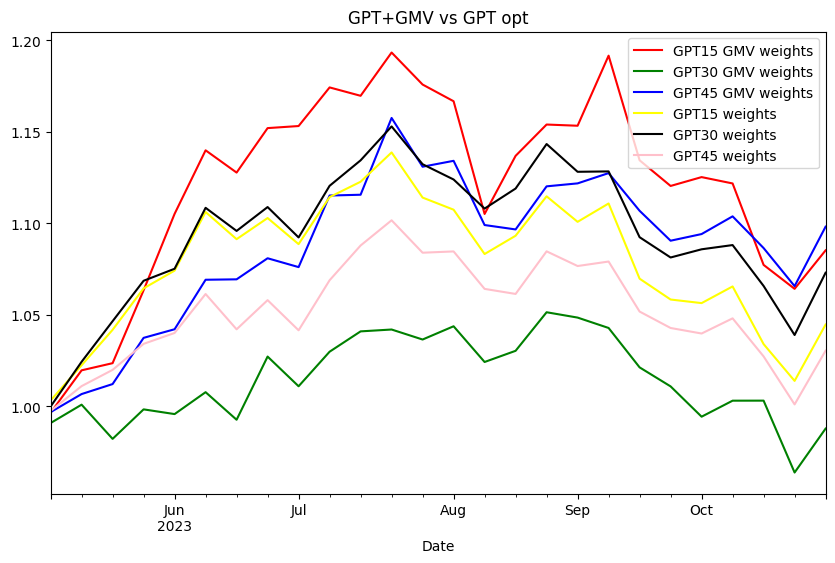

In [56]:
plt.figure(figsize=(10,6))
plt.title("GPT+GMV vs GPT opt")

cum_15.plot(label='GPT15 GMV weights', color='red')
cum_30.plot(label='GPT30 GMV weights', color='green')
cum_45.plot(label='GPT45 GMV weights', color='blue')
gpt_15.plot(label='GPT15 weights', color='yellow')
gpt_30.plot(label='GPT30 weights', color='black')
gpt_45.plot(label='GPT45 weights', color='pink')

plt.legend()
plt.show()

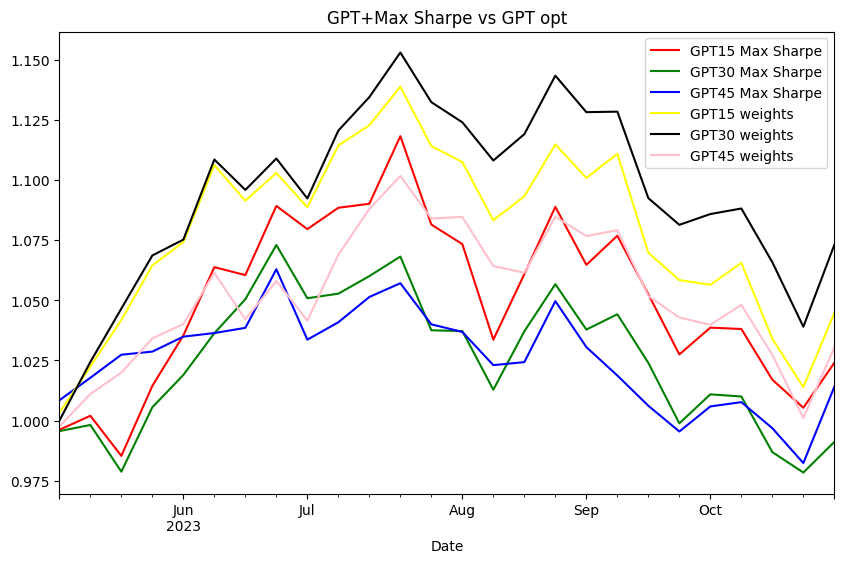

In [64]:
plt.figure(figsize=(10,6))
plt.title("GPT+Max Sharpe vs GPT opt")

msf_15.plot(label='GPT15 Max Sharpe', color='red')
msf_30.plot(label='GPT30 Max Sharpe', color='green')
msf_45.plot(label='GPT45 Max Sharpe', color='blue')
gpt_15.plot(label='GPT15 weights', color='yellow')
gpt_30.plot(label='GPT30 weights', color='black')
gpt_45.plot(label='GPT45 weights', color='pink')

plt.legend()
plt.show()

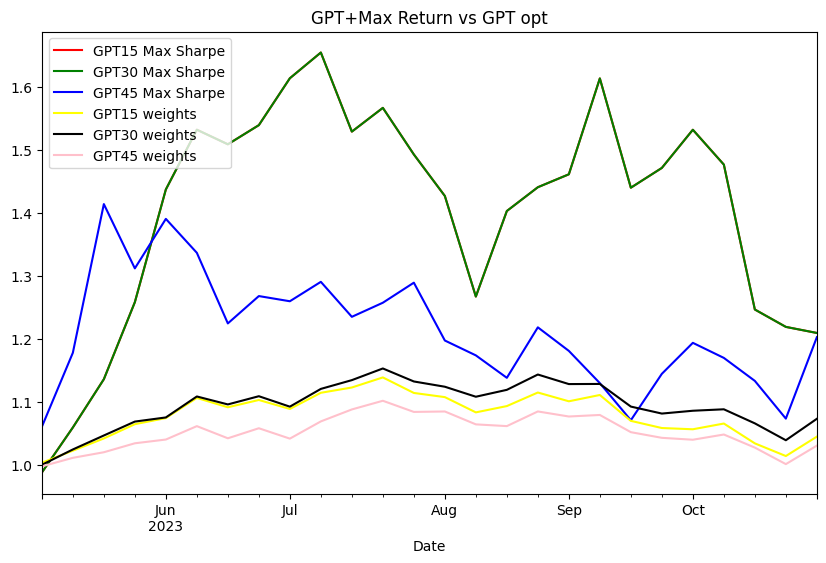

In [76]:
plt.figure(figsize=(10,6))
plt.title("GPT+Max Return vs GPT opt")

max_15.plot(label='GPT15 Max Sharpe', color='red')
max_30.plot(label='GPT30 Max Sharpe', color='green')
max_45.plot(label='GPT45 Max Sharpe', color='blue')
gpt_15.plot(label='GPT15 weights', color='yellow')
gpt_30.plot(label='GPT30 weights', color='black')
gpt_45.plot(label='GPT45 weights', color='pink')

plt.legend()
plt.show()